# GOTO Stock Price Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('GOTO.JK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-13,81.0,108.0,81.0,100.0,100.0,26555346900
1,2022-12-14,102.0,104.0,93.0,94.0,94.0,8603484800
2,2022-12-15,94.0,97.0,90.0,97.0,97.0,3462893800
3,2022-12-16,95.0,97.0,92.0,96.0,96.0,2824421100
4,2022-12-19,95.0,95.0,91.0,92.0,92.0,2101922500


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# 'Date' is the datetime column
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-13,81.0,108.0,81.0,100.0,100.0,26555346900
2022-12-14,102.0,104.0,93.0,94.0,94.0,8603484800
2022-12-15,94.0,97.0,90.0,97.0,97.0,3462893800
2022-12-16,95.0,97.0,92.0,96.0,96.0,2824421100
2022-12-19,95.0,95.0,91.0,92.0,92.0,2101922500


In [ ]:
df = df[['Close']]
df.head()

,Close
Date,
2022-12-13,100.0
2022-12-14,94.0
2022-12-15,97.0
2022-12-16,96.0
2022-12-19,92.0


# Normalize the Data and Train Test Split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

# Create sequences for LSTM

In [ ]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

sequence_length = 10  # You can adjust this based on your preference
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
3/3 [==============================] - 6s 19ms/step - loss: 0.3513
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 0.2140
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.1089
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0309
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0136
Epoch 6/10
3/3 [==============================] - 0s 20ms/step - loss: 0.0372
Epoch 7/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0240
Epoch 8/10
3/3 [==============================] - 0s 18ms/step - loss: 0.0091
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0097
Epoch 10/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0142


# Visualize the Actual and Predicted Close Price

2/2 [==============================] - 1s 7ms/step
Mean Squared Error: 91.2639633968565


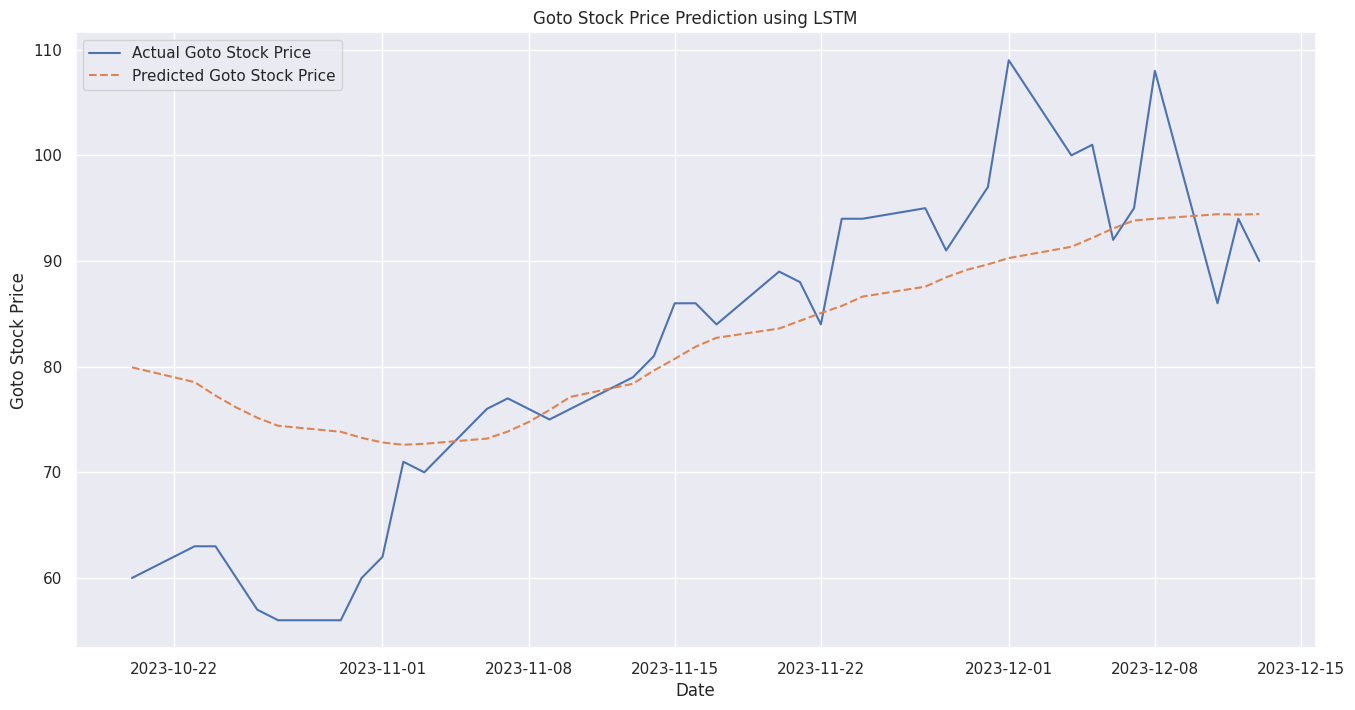

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Evaluate the model (you can use various metrics depending on your requirements)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]['Close'], predictions)
print(f'Mean Squared Error: {mse}')

# Plot the predictions
plt.figure(figsize=(16, 8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]['Close'], label='Actual Goto Stock Price')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Goto Stock Price', linestyle='dashed')
plt.title('Goto Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Goto Stock Price')
plt.legend()
plt.show()

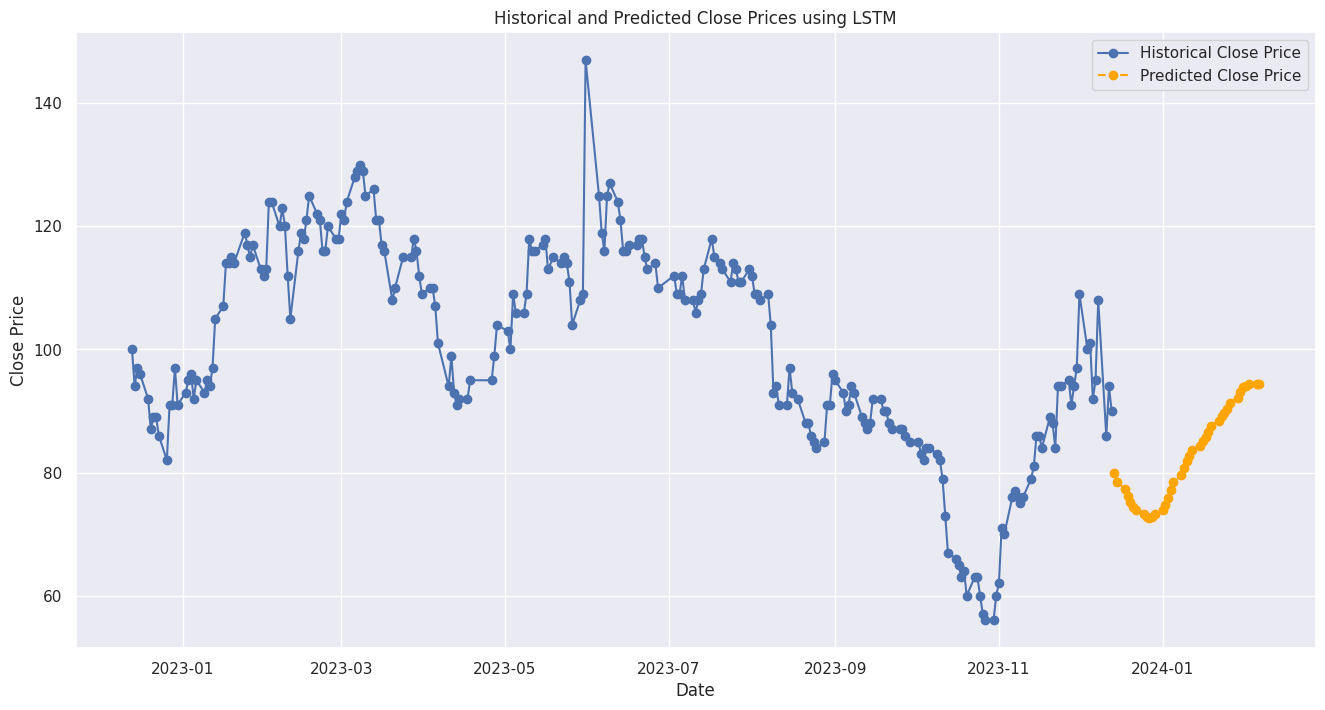

In [ ]:
# Update the column name used for Close Prices
close_price_column = 'Close'  # Replace with the correct column name 'Close'

# Plot the historical Close Prices
plt.figure(figsize=(16, 8))
plt.plot(df.index, df[close_price_column], label='Historical Close Price', marker='o', linestyle='-', color='b')

# Plot the predicted Close Prices
predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Close Price', linestyle='dashed', color='orange', marker='o')

plt.title('Historical and Predicted Close Prices using LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Predict Open Price

In [ ]:
df = pd.read_csv('GOTO.JK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-13,81.0,108.0,81.0,100.0,100.0,26555346900
1,2022-12-14,102.0,104.0,93.0,94.0,94.0,8603484800
2,2022-12-15,94.0,97.0,90.0,97.0,97.0,3462893800
3,2022-12-16,95.0,97.0,92.0,96.0,96.0,2824421100
4,2022-12-19,95.0,95.0,91.0,92.0,92.0,2101922500


In [ ]:
# 'Date' is the datetime column
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-13,81.0,108.0,81.0,100.0,100.0,26555346900
2022-12-14,102.0,104.0,93.0,94.0,94.0,8603484800
2022-12-15,94.0,97.0,90.0,97.0,97.0,3462893800
2022-12-16,95.0,97.0,92.0,96.0,96.0,2824421100
2022-12-19,95.0,95.0,91.0,92.0,92.0,2101922500


In [ ]:
df = df[['Open']]
df.head()

,Open
Date,
2022-12-13,81.0
2022-12-14,102.0
2022-12-15,94.0
2022-12-16,95.0
2022-12-19,95.0


# Normalize the Data and Train Test Split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

# Create sequences for LSTM

In [ ]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

sequence_length = 10  # You can adjust this based on your preference
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build and train the LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
3/3 [==============================] - 4s 18ms/step - loss: 0.3849
Epoch 2/10
3/3 [==============================] - 0s 17ms/step - loss: 0.2089
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0729
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0167
Epoch 5/10
3/3 [==============================] - 0s 20ms/step - loss: 0.0522
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0340
Epoch 7/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0116
Epoch 8/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0143
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 0.0204
Epoch 10/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0191


# Visualize the Actual and Predicted Open Price

2/2 [==============================] - 1s 14ms/step
Mean Squared Error: 86.14642168147614


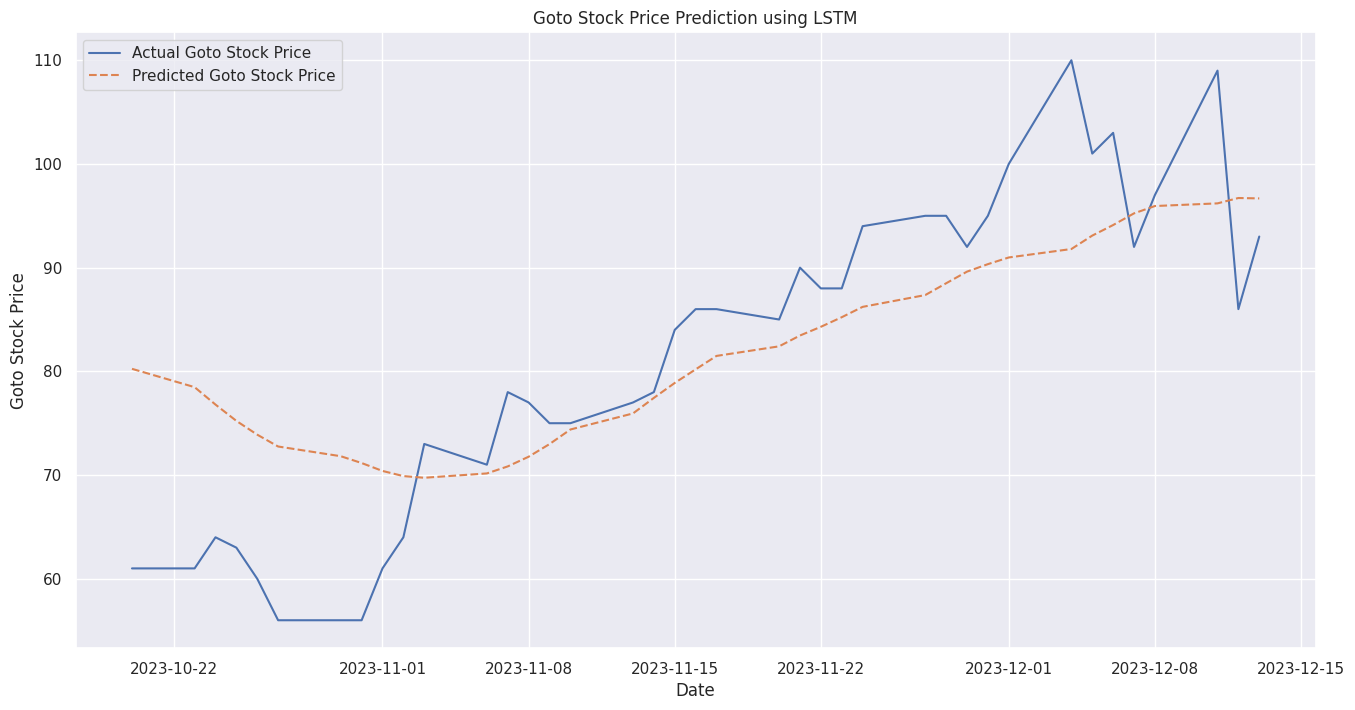

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Evaluate the model (you can use various metrics depending on your requirements)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df[-len(predictions):]['Open'], predictions)
print(f'Mean Squared Error: {mse}')

# Plot the predictions
plt.figure(figsize=(16, 8))
plt.plot(df.index[-len(predictions):], df[-len(predictions):]['Open'], label='Actual Goto Stock Price')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Goto Stock Price', linestyle='dashed')
plt.title('Goto Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Goto Stock Price')
plt.legend()
plt.show()

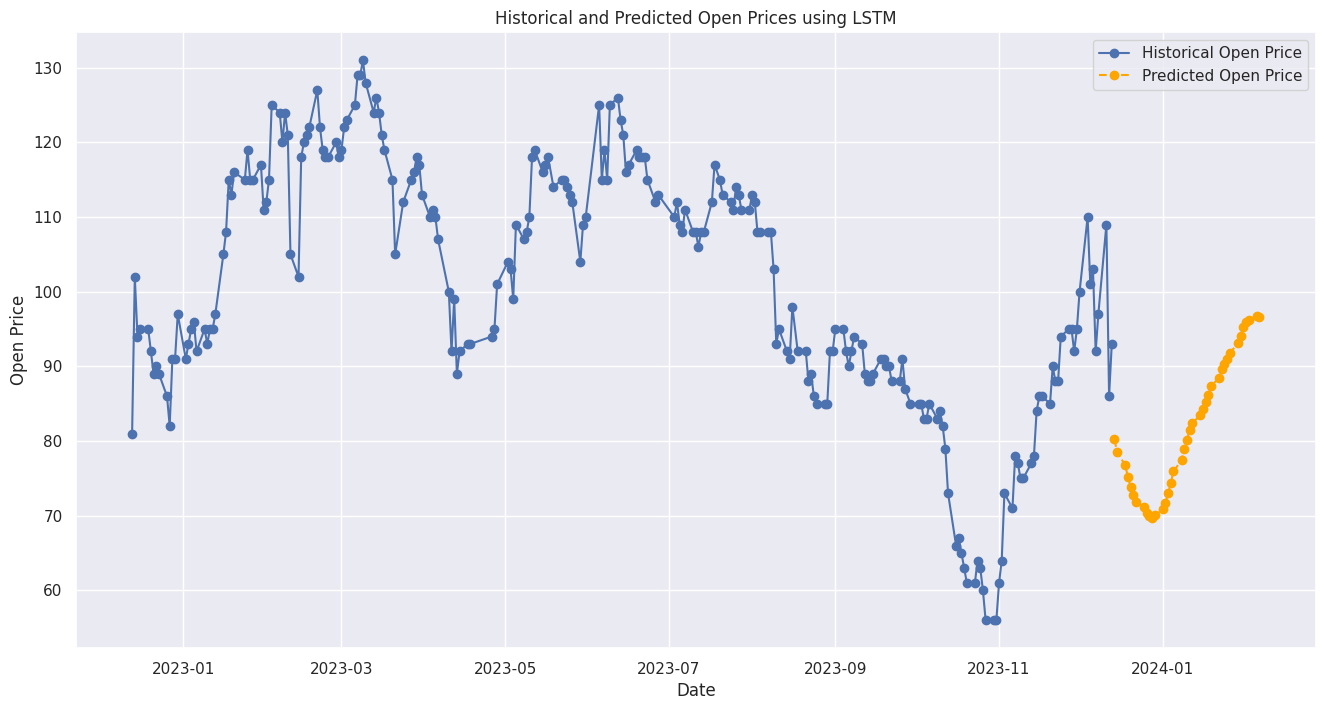

In [ ]:
# Update the column name used for Open Prices
open_price_column = 'Open'  # Replace with the correct column name 'Open'

# Plot the historical Open Prices
plt.figure(figsize=(16, 8))
plt.plot(df.index, df[open_price_column], label='Historical Open Price', marker='o', linestyle='-', color='b')

# Plot the predicted Open Prices
predicted_dates = pd.date_range(start=df.index[-1], periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_dates, predictions, label='Predicted Open Price', linestyle='dashed', color='orange', marker='o')

plt.title('Historical and Predicted Open Prices using LSTM')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()